# Импорт библиотек

In [1]:
from moexalgo import Market, Ticker

# Загрузка данных

In [9]:
def get_history(ticker, date):
    loader = Ticker(ticker)
    one_day_df = loader.tradestats(date=date, till_date=date)
    if one_day_df.shape[0] > 0:
        print(one_day_df.shape)
        one_day_df.to_pickle(f"../data/raw/{date.replace('-','')}_{ticker}.pkl")
    else:
        print('Данных нет')

## История

In [57]:
from datetime import date, timedelta
import time

ticker='YNDX'

start_date = date(2023, 1, 1)
end_date = date(2023, 12, 1)

while start_date <= end_date:
    date = start_date.strftime("%Y-%m-%d")
    print(date)
    get_history(ticker, date)
    start_date += timedelta(days=1)
    time.sleep(3)

2023-01-01
2023-01-02
2023-01-03
2023-01-04
2023-01-05
2023-01-06
2023-01-07
2023-01-08
2023-01-09
2023-01-10
2023-01-11
2023-01-12
2023-01-13
2023-01-14
2023-01-15
2023-01-16
2023-01-17
2023-01-18
2023-01-19
2023-01-20
2023-01-21
2023-01-22
2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-01-28
2023-01-29
2023-01-30
2023-01-31
2023-02-01
2023-02-02
2023-02-03
2023-02-04
2023-02-05
2023-02-06
2023-02-07
2023-02-08
2023-02-09
2023-02-10
2023-02-11
2023-02-12
2023-02-13
2023-02-14
2023-02-15
2023-02-16
2023-02-17
2023-02-18
2023-02-19
2023-02-20
2023-02-21
2023-02-22
2023-02-23
2023-02-24
2023-02-25
2023-02-26
2023-02-27
2023-02-28
2023-03-01
2023-03-02
2023-03-03
2023-03-04
2023-03-05
2023-03-06
2023-03-07
2023-03-08
2023-03-09
2023-03-10
2023-03-11
2023-03-12
2023-03-13
2023-03-14
2023-03-15
2023-03-16
2023-03-17
2023-03-18
2023-03-19
2023-03-20
2023-03-21
2023-03-22
2023-03-23
2023-03-24
2023-03-25
2023-03-26
2023-03-27
2023-03-28
2023-03-29
2023-03-30
2023-03-31
2023-04-01

## Ежедневные загрузки

In [10]:
from datetime import datetime, timedelta

yesterday = datetime.today() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')
ticker='YNDX'
get_history(ticker, yesterday)

Данных нет


In [18]:
loader = Ticker('YNDX')
one_day_df = loader.tradestats(date='2023-12-02', till_date='2023-12-02')
one_day_df

""


In [11]:
yesterday

'2023-12-02'

# Препроцессинг

In [1]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import glob
import os

In [2]:
all_files = glob.glob("../data/raw/*.pkl")

df = []
for filename in all_files:
    tdf = pd.read_pickle(filename)
    df.append(tdf)

df = pd.concat(df, axis=0, ignore_index=True)
df['pr_mean'] = df[['pr_high','pr_low']].mean(axis=1)

df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,systime,pr_mean
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,63,4477160.0,2065844.0,2453,1133,0.37,1825.2,1823.3,2023-10-27 00:31:40,1823.5
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,47,2505360.0,1929068.0,1370,1056,0.13,1828.7,1826.8,2023-10-27 00:31:41,1826.3
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,27,695113.0,304559.0,381,167,0.39,1824.4,1823.7,2023-10-27 00:31:42,1824.7
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,77,2872988.0,1857655.0,1570,1015,0.21,1829.9,1830.2,2023-10-27 00:31:43,1829.6
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,308,4913530.0,16156931.0,2699,8885,-0.53,1820.5,1818.5,2023-10-27 00:31:43,1820.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,YNDX,2023-12-01,18:20:00,2441.2,2448.4,2437.2,2440.8,0.0003,16780,40974754.0,...,326,20593316.0,20381438.0,8433,8347,0.01,2442.0,2441.8,2023-12-01 18:20:10,2442.8
24122,YNDX,2023-12-01,18:25:00,2441.2,2448.0,2435.2,2435.4,0.0004,32395,79114293.0,...,413,40138964.0,38975328.0,16437,15958,0.01,2442.0,2442.4,2023-12-01 18:25:10,2441.6
24123,YNDX,2023-12-01,18:30:00,2435.4,2439.4,2427.0,2431.6,0.0003,28797,70058852.0,...,668,33627778.0,36431074.0,13823,14974,-0.04,2432.7,2433.0,2023-12-01 18:30:10,2433.2
24124,YNDX,2023-12-01,18:35:00,2431.6,2435.0,2422.2,2428.2,0.0004,38289,92961344.0,...,604,48653638.0,44307706.0,20042,18247,0.05,2427.6,2428.2,2023-12-01 18:35:10,2428.6


In [3]:
dist=5

peaks, _ = find_peaks(df['pr_mean'], distance=dist)
temp = pd.DataFrame(index=peaks)
temp['peak'] = 1
df = df.join(temp)
df['peak'] = df['peak'].fillna(0).astype(int)


peaks, _ = find_peaks(0 - df['pr_mean'], distance=dist)
temp = pd.DataFrame(index=peaks)
temp['trough'] = 2
df = df.join(temp)
df['trough'] = df['trough'].fillna(0).astype(int)


df['target'] = df[['trough','peak']].max(axis=1)

In [4]:
df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,systime,pr_mean,peak,trough,target
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,2453,1133,0.37,1825.2,1823.3,2023-10-27 00:31:40,1823.5,0,0,0
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,1370,1056,0.13,1828.7,1826.8,2023-10-27 00:31:41,1826.3,0,0,0
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,381,167,0.39,1824.4,1823.7,2023-10-27 00:31:42,1824.7,0,0,0
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,1570,1015,0.21,1829.9,1830.2,2023-10-27 00:31:43,1829.6,1,0,1
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,2699,8885,-0.53,1820.5,1818.5,2023-10-27 00:31:43,1820.1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,YNDX,2023-12-01,18:20:00,2441.2,2448.4,2437.2,2440.8,0.0003,16780,40974754.0,...,8433,8347,0.01,2442.0,2441.8,2023-12-01 18:20:10,2442.8,1,0,1
24122,YNDX,2023-12-01,18:25:00,2441.2,2448.0,2435.2,2435.4,0.0004,32395,79114293.0,...,16437,15958,0.01,2442.0,2442.4,2023-12-01 18:25:10,2441.6,0,0,0
24123,YNDX,2023-12-01,18:30:00,2435.4,2439.4,2427.0,2431.6,0.0003,28797,70058852.0,...,13823,14974,-0.04,2432.7,2433.0,2023-12-01 18:30:10,2433.2,0,0,0
24124,YNDX,2023-12-01,18:35:00,2431.6,2435.0,2422.2,2428.2,0.0004,38289,92961344.0,...,20042,18247,0.05,2427.6,2428.2,2023-12-01 18:35:10,2428.6,0,2,2


In [5]:
df['dt'] = df[['tradedate','tradetime']].astype(str).apply(lambda row: row['tradedate'] + ' ' + row['tradetime'], axis=1)
df['dt'] = pd.to_datetime(df['dt'])

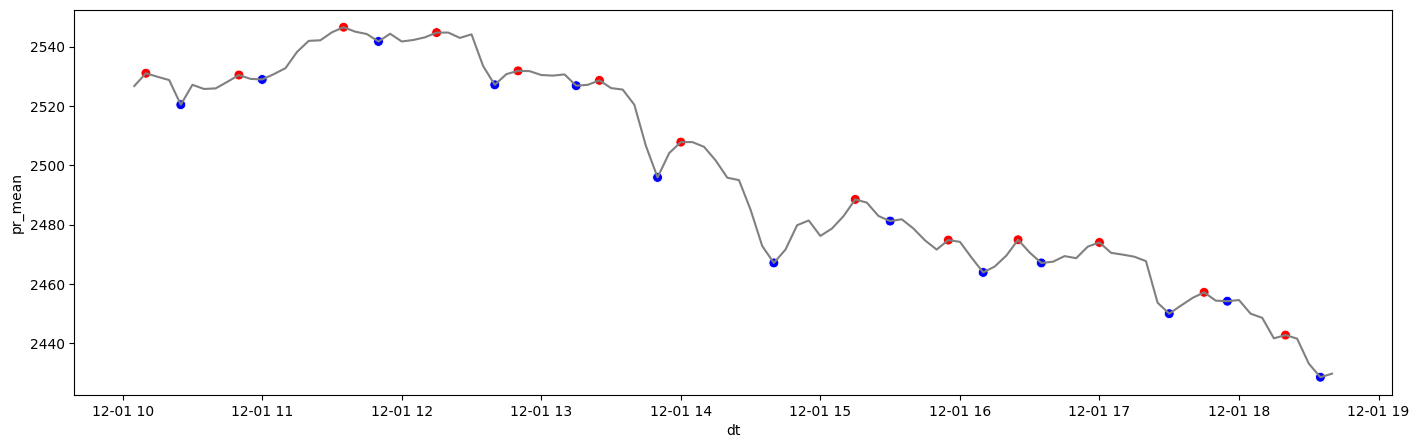

In [6]:
temp = df[['dt','tradetime','target','pr_mean']][-104:]
plt.figure(figsize=(17,5))
sns.lineplot(x=temp['dt'], y=temp['pr_mean'], c='grey')
colors = temp.query('target > 0')['target'].map({1:'red',2:'blue'}).to_list()
sns.scatterplot(x=temp.query('target > 0')['dt'], y=temp.query('target > 0')['pr_mean'], c=colors, s=50);

# Обучение

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from catboost import CatBoostClassifier
from catboost import CatBoost

import warnings
warnings.filterwarnings('ignore')

In [279]:
drop_cols = ['ticker','tradedate','tradetime','systime','pr_mean','peak','trough','target'] 
f_cols = [col for col in df.columns if col not in drop_cols]

train = df[df['tradedate'].astype('str') < '2023-12-01']
test = df[df['tradedate'].astype('str') == '2023-12-01']

X_train, y_train = train[f_cols], train['target']
X_test, y_test = test[f_cols], test['target']

print(X_train.shape, X_test.shape)
print(y_train.mean() * 100, y_test.mean() * 100)

(24022, 19) (104, 19)
38.06510698526351 37.5


In [325]:
params = {
    'iterations': [1000],
    'learning_rate': [0.1, 0.05, 0.01],
    'depth': [6, 8]}

clf = CatBoostClassifier(logging_level='Silent', random_seed=42)
model = GridSearchCV(
    clf,
    params,
    scoring='precision_macro',
    cv=TimeSeriesSplit(n_splits=5))
model.fit(X_train, y_train)

print(model.best_score_ * 100)
print(model.best_params_)

48.657076790148714
{'depth': 8, 'iterations': 1000, 'learning_rate': 0.05}


In [332]:
y_pred = model.predict(X_test)
precision_score(y_test, y_pred, average='macro') * 100

47.3922902494331

In [333]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [327]:
import lightgbm as lgb

In [328]:
clf = lgb.LGBMClassifier()

In [329]:
clf.fit(X_train, y_train)

  File "C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4546
[LightGBM] [Info] Number of data points in the train set: 24022, number of used features: 19
[LightGBM] [Info] Start training from score -0.293276
[LightGBM] [Info] Start training from score -2.057944
[LightGBM] [Info] Start training from score -2.067771


LGBMClassifier()

In [330]:
y_pred = clf.predict(X_test)
precision_score(y_test, y_pred, average='macro') * 100

58.415841584158414

In [334]:
y_pred.sum()

9

In [349]:
params = {
    'n_estimators ': [10, 20, 30, 50],
    'learning_rate ': [0.5, 0.3, 0.1, 0.05, 0.01],
    'max_depth ': [6, 8, 10]}

clf = lgb.LGBMClassifier(verbosity=-1)
model = GridSearchCV(
    clf,
    params,
    scoring='precision_macro',
    cv=TimeSeriesSplit(n_splits=3))
model.fit(X_train, y_train)

print(model.best_score_ * 100)
print(model.best_params_)

44.55504395252844
{'learning_rate ': 0.5, 'max_depth ': 6, 'n_estimators ': 10}


In [350]:
y_pred = model.predict(X_test)
precision_score(y_test, y_pred, average='macro') * 100

58.415841584158414

In [388]:
model.best_estimator_.booster_.save_model('../models/model.lgb')

In [ ]:
my_model.booster_.save_model('mode.txt')
#load from model:

bst = lgb.Booster(model_file='mode.txt')